In [2]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 78


KeyboardInterrupt: 

handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


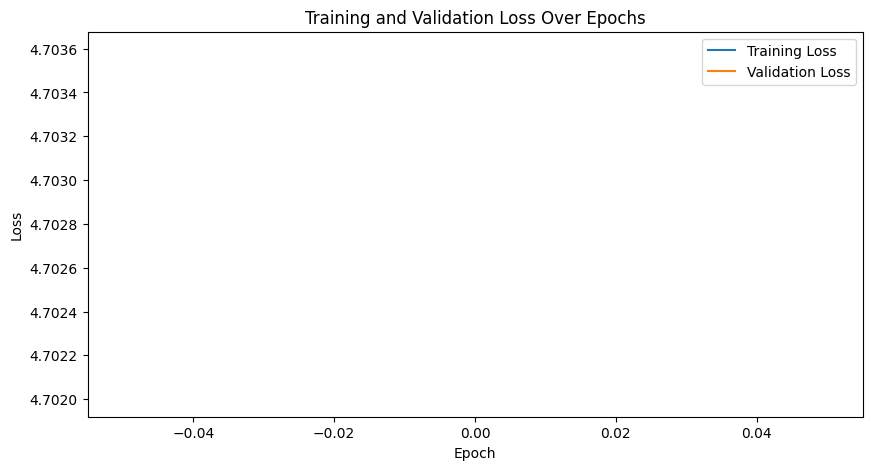

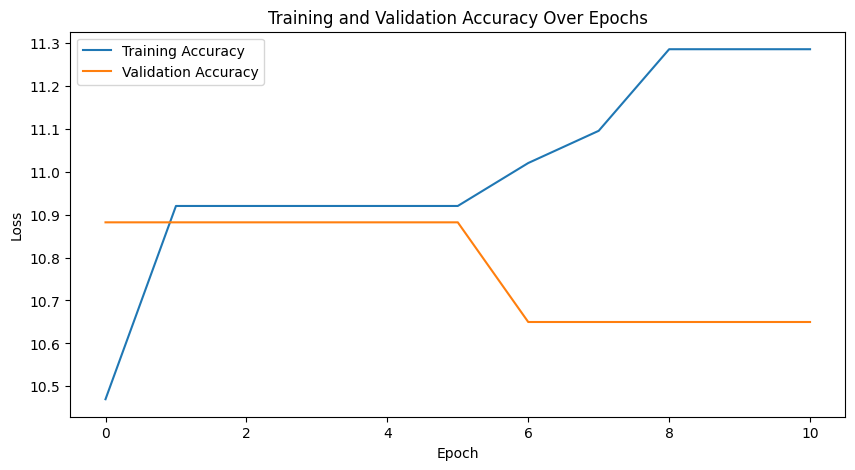

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

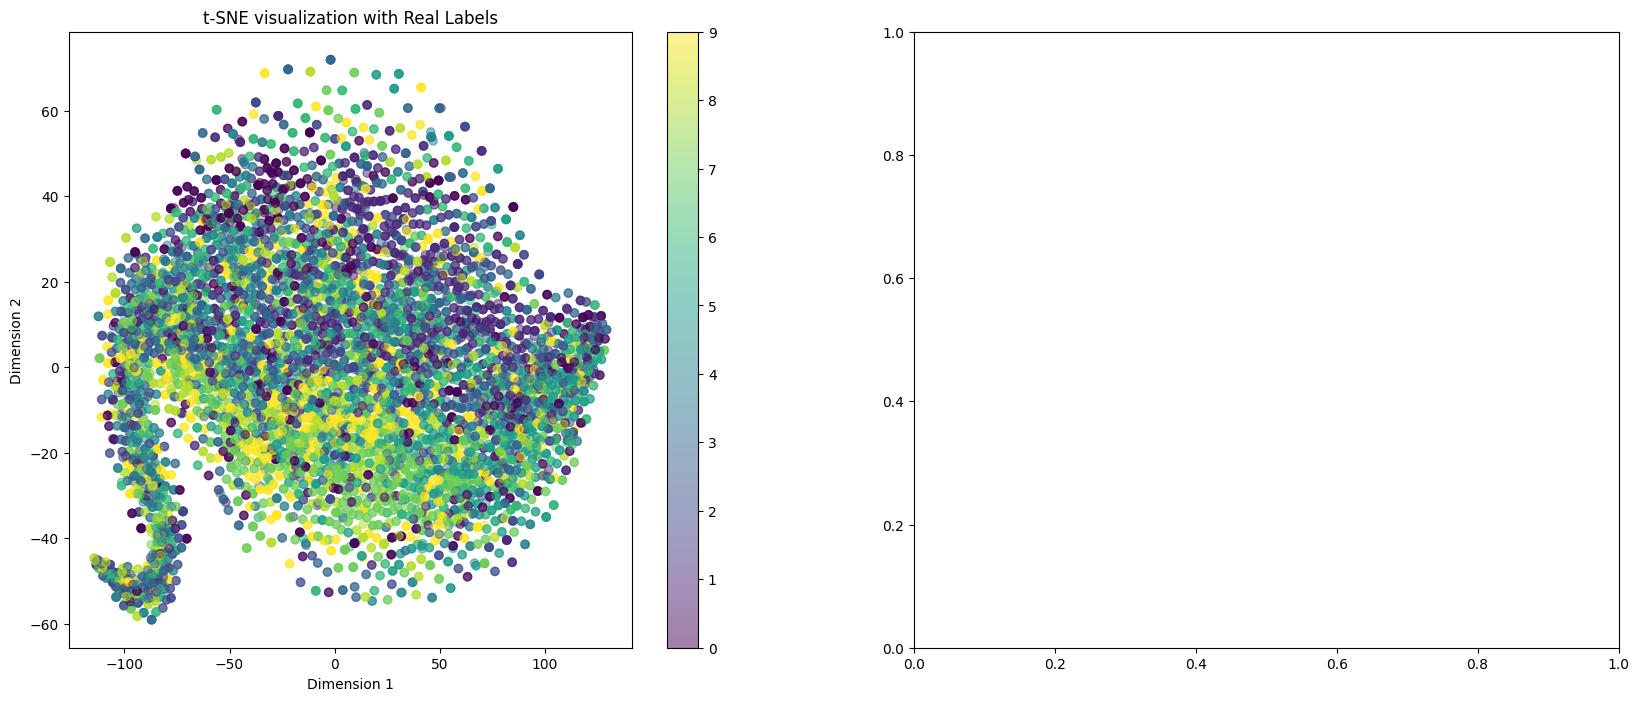

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10 - 20

In [ ]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



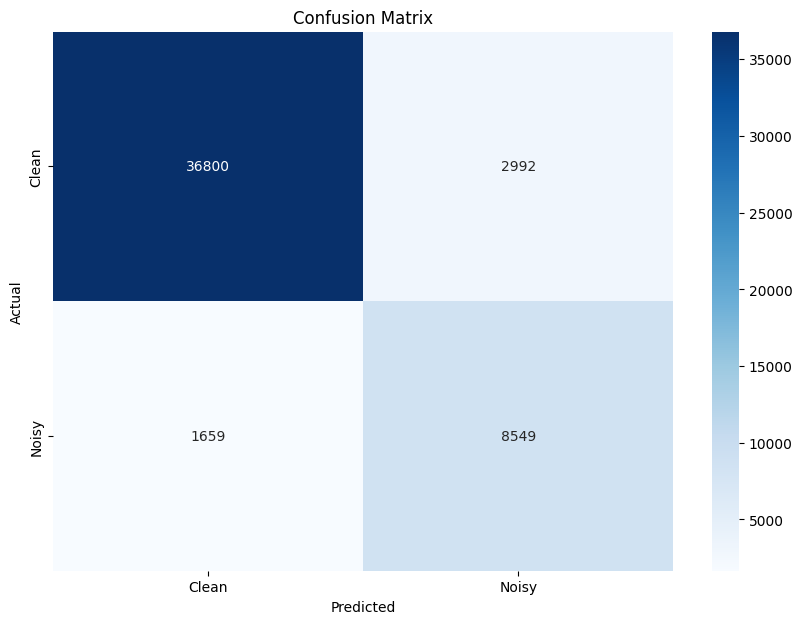

In [9]:
noise_cleaner.report(mistakes_count=9)

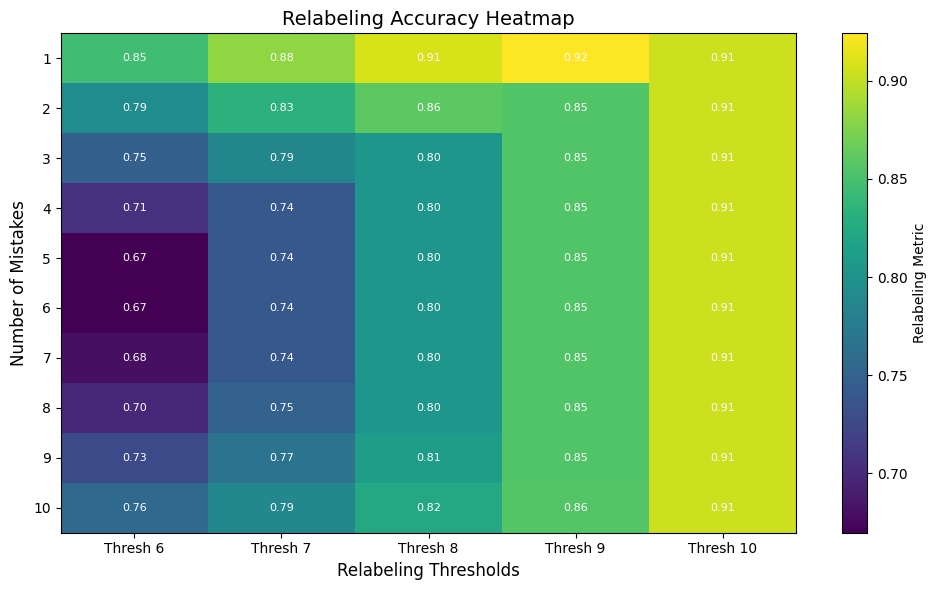

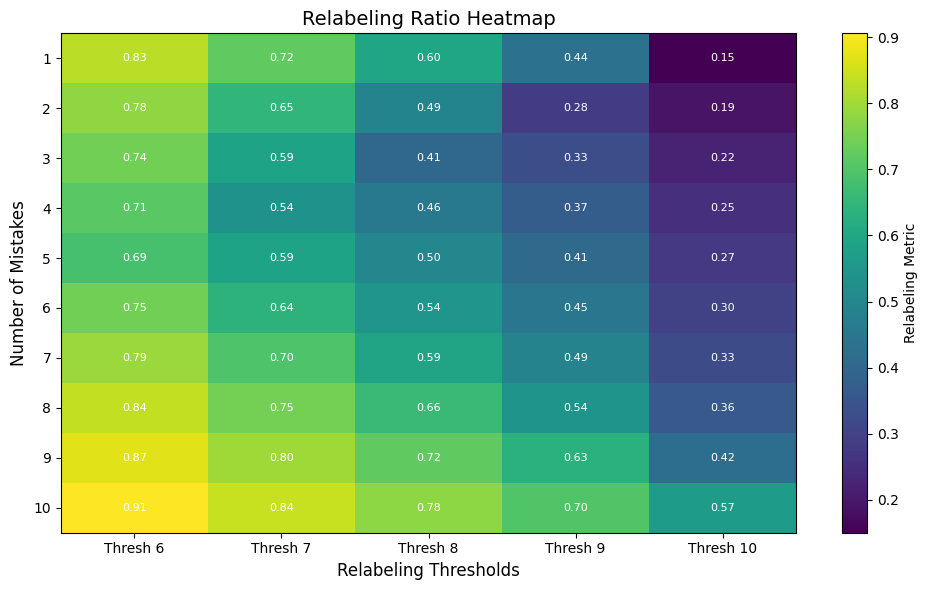

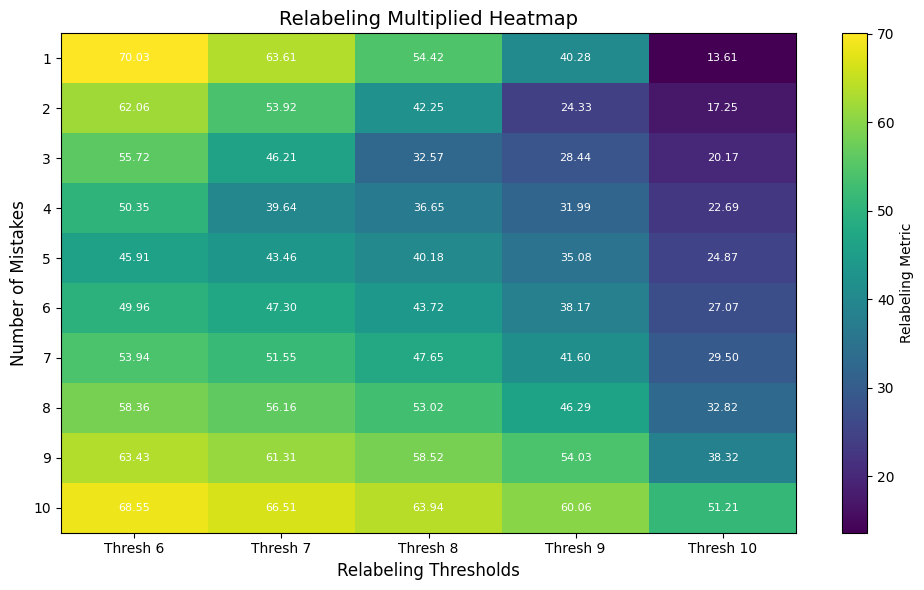

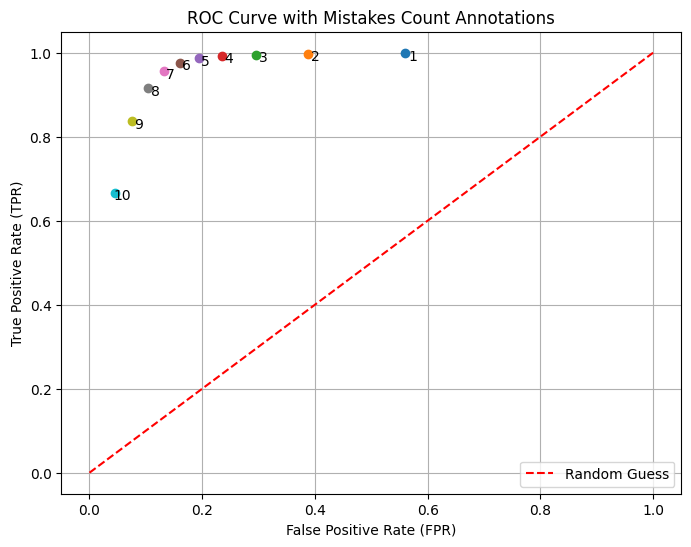

Area Under the Curve (AUC): 0.49907322987450103


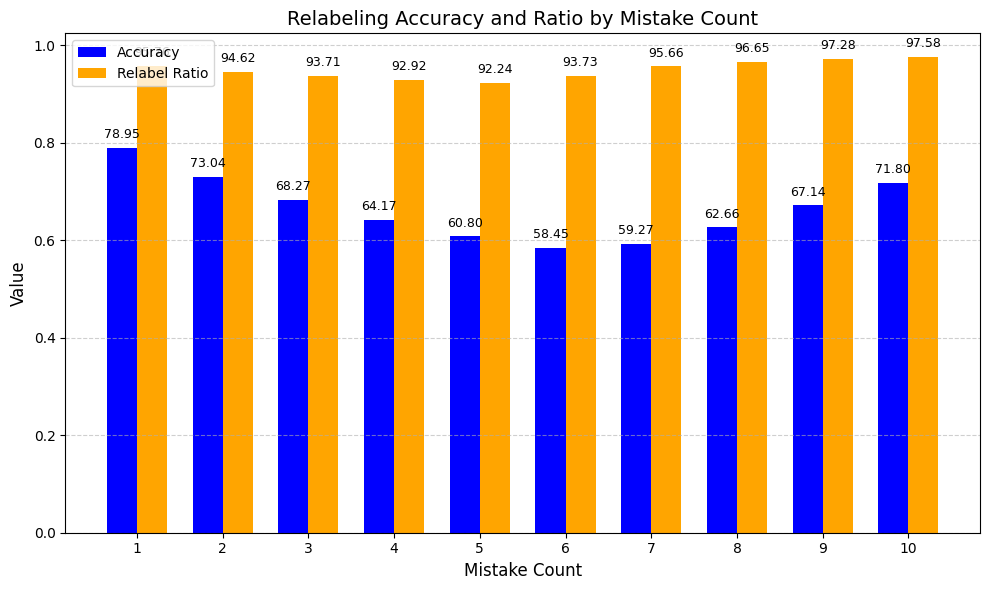

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



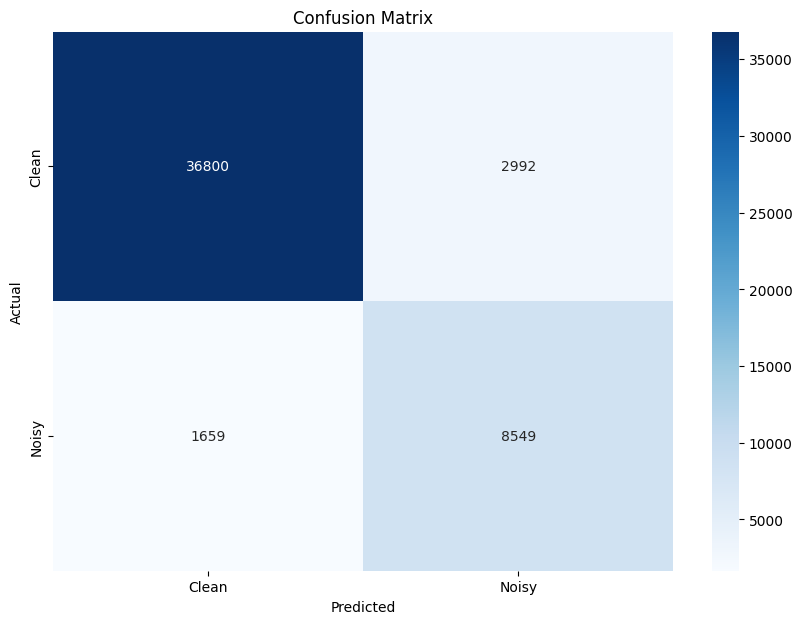

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



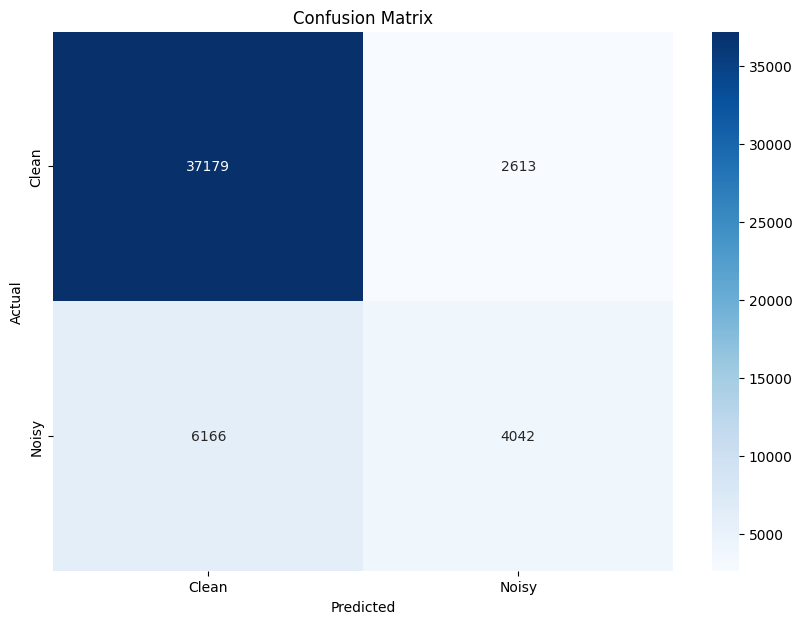

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


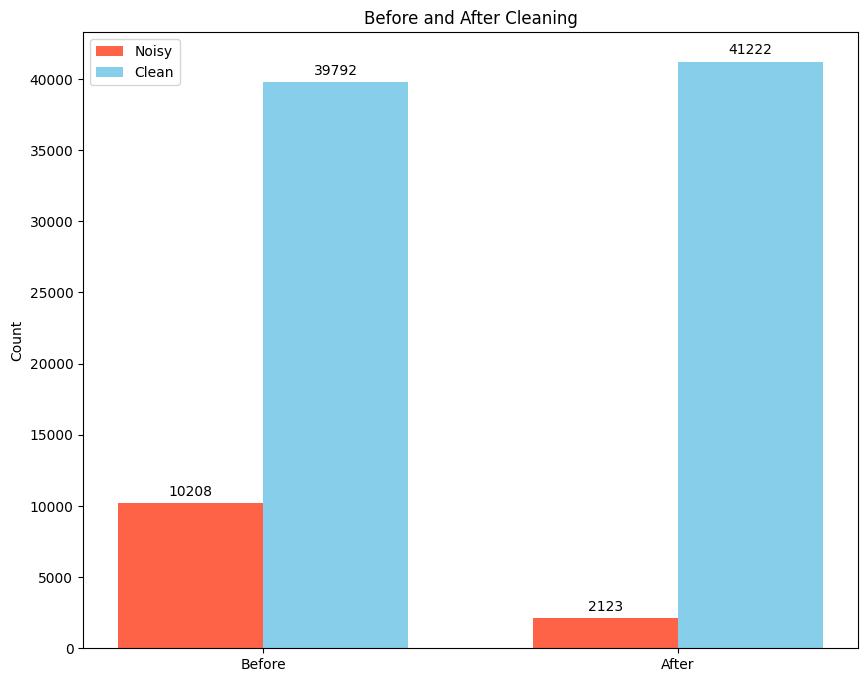

100%|██████████| 43345/43345 [05:45<00:00, 125.37it/s] 


Cleaned dataset saved to cleaned/Advanced-CIFAR10.pkl


In [4]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

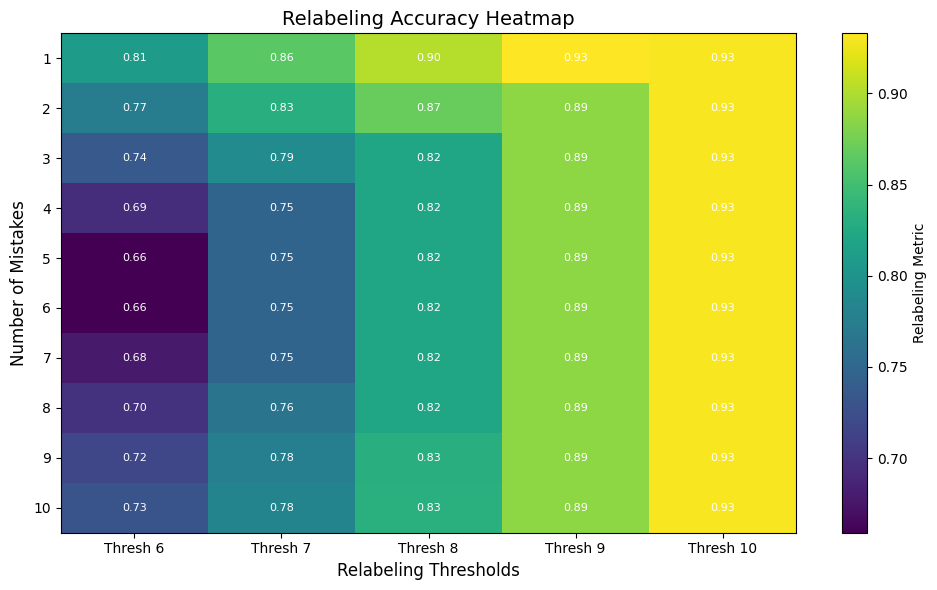

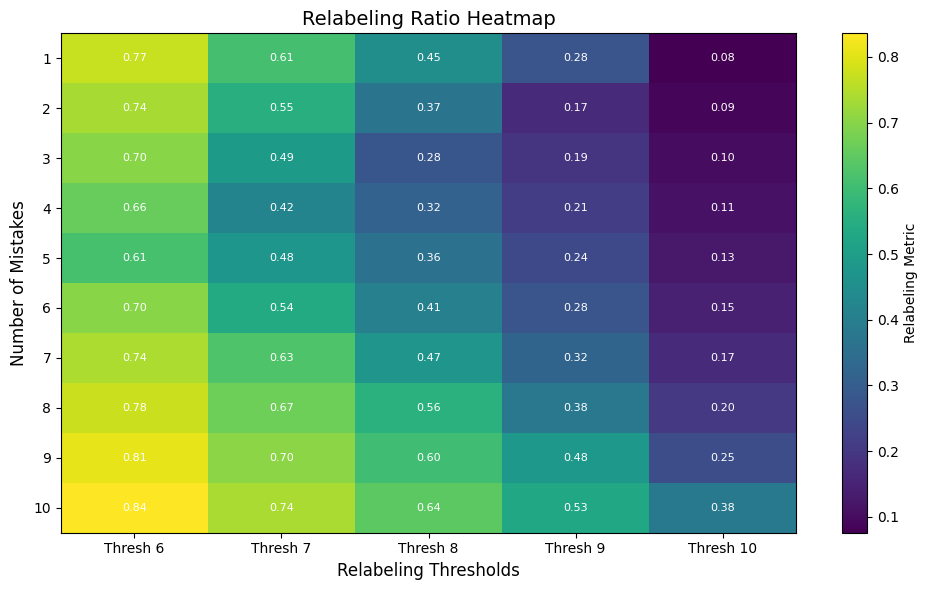

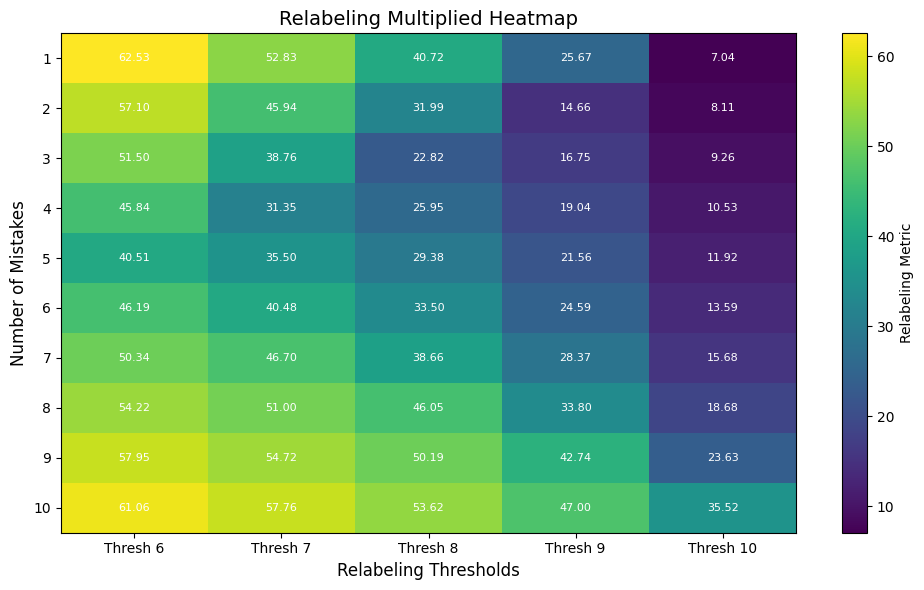

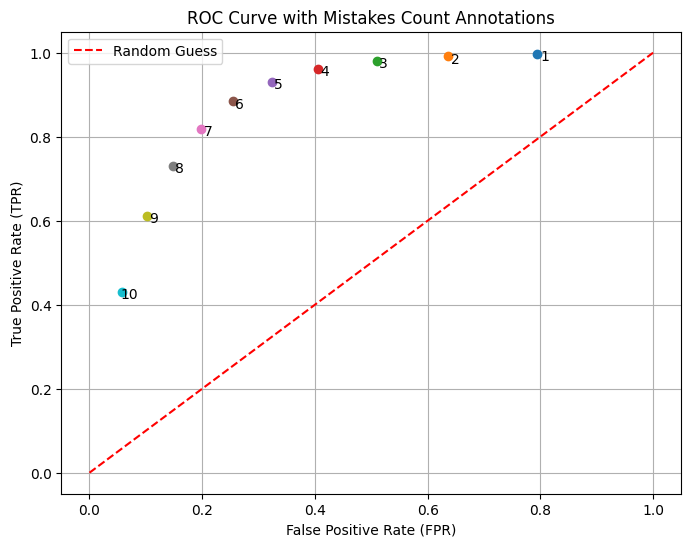

Area Under the Curve (AUC): 0.6646810900562569


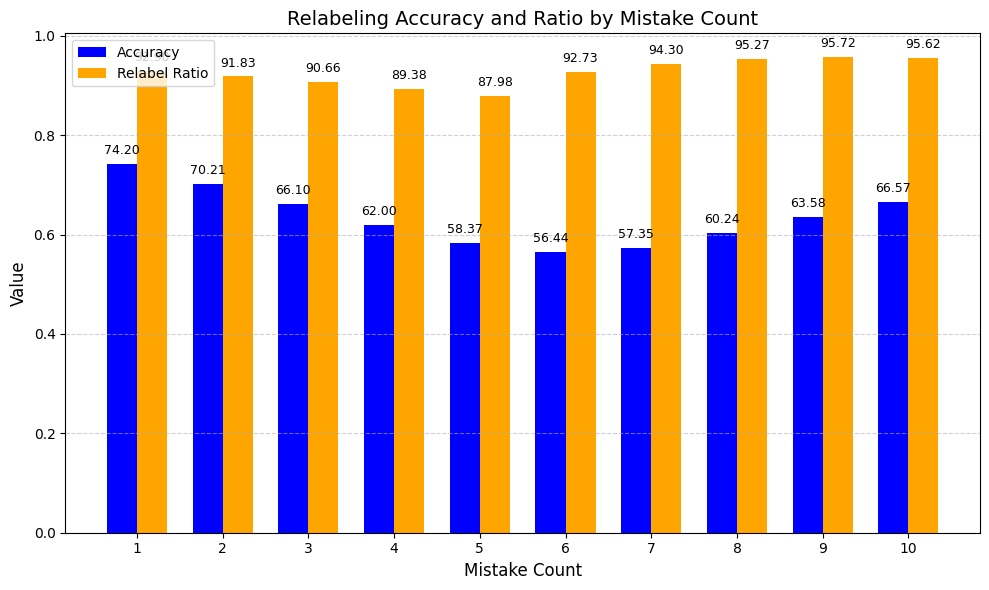

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



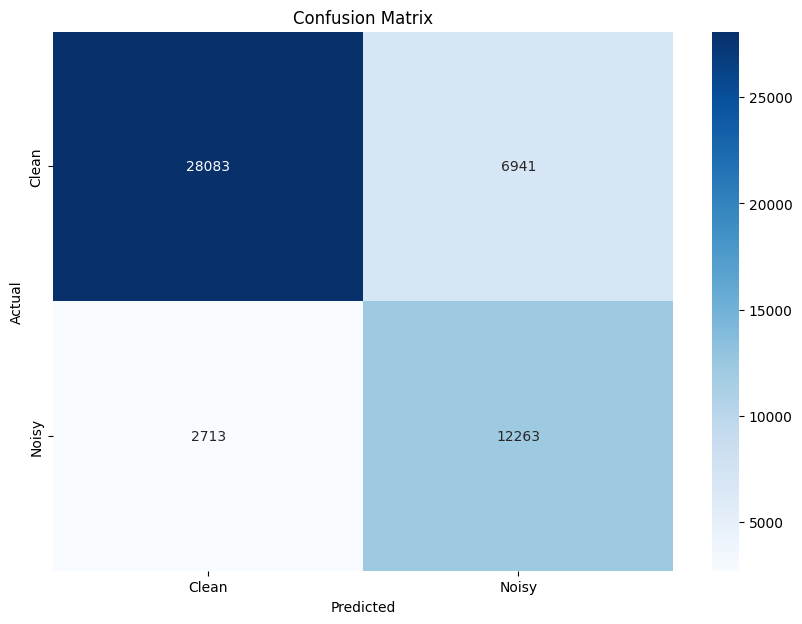

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



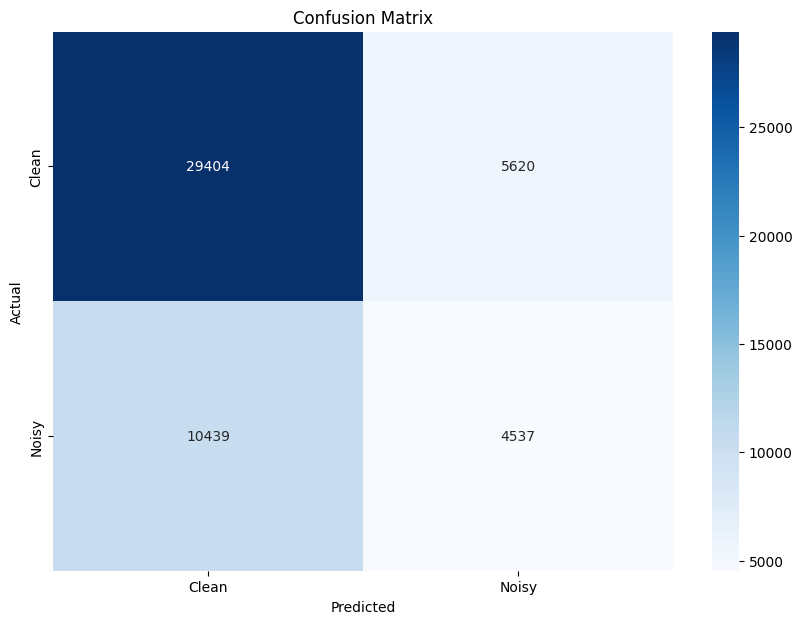

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


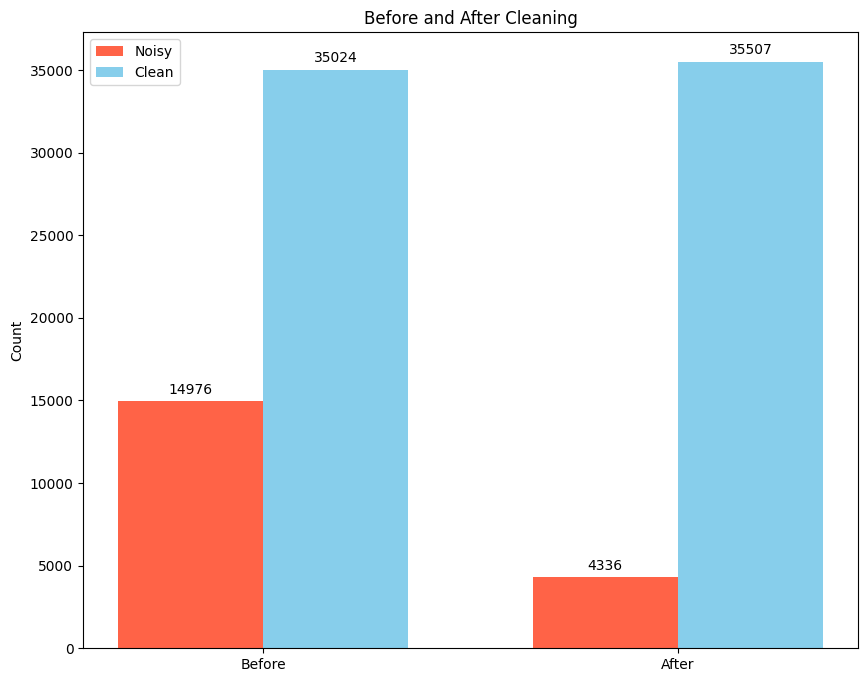

100%|██████████| 39843/39843 [00:01<00:00, 20965.34it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [ ]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

## CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.4, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 19803 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
70.13729977116705% accuracy in 874 data
Loaded 874 noisy indices from cifar10(40)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
63.282937365010795% accuracy in 926 data
Loaded 926 noisy indices from cifar10(40)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
69.01408450704226% accuracy in 923 data
Loaded 923 noisy indices from cifar10(40)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
71.32947976878613% accuracy in 865 data
Loaded 865 noisy indices from cifar10(40)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
67.70114942528735% accuracy in 870 data
Loaded 870 noisy indices from cifar10(40)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
63.24884792626728% accuracy in 868 data
Loaded 868 noisy indices from cifar10(40)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
68.40148698884758% accuracy in 807 data
Loaded 807 noisy 

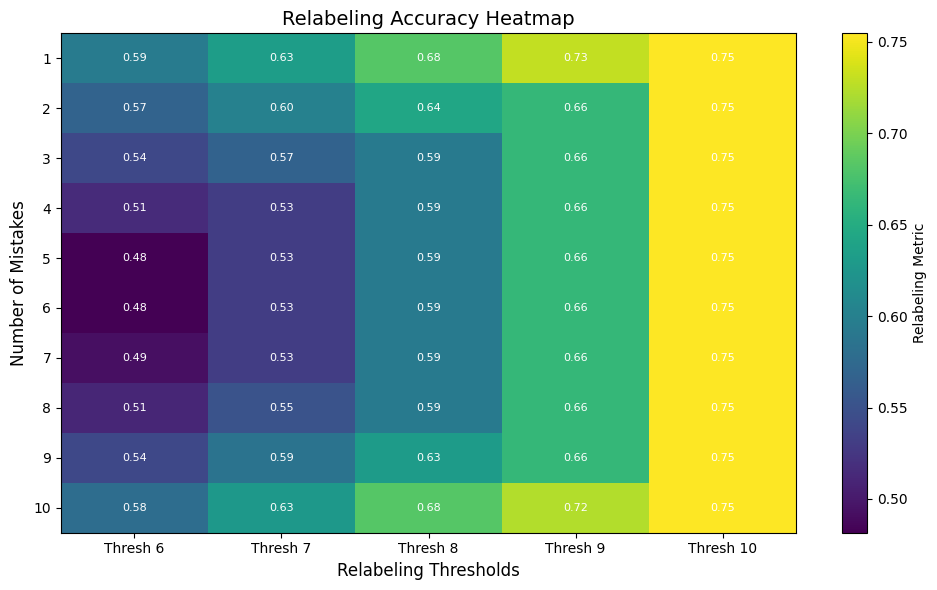

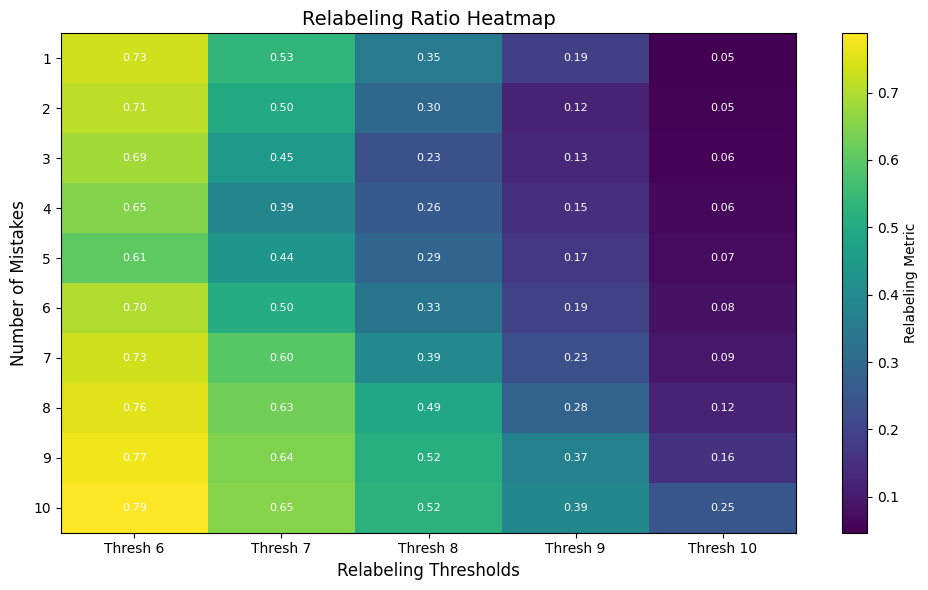

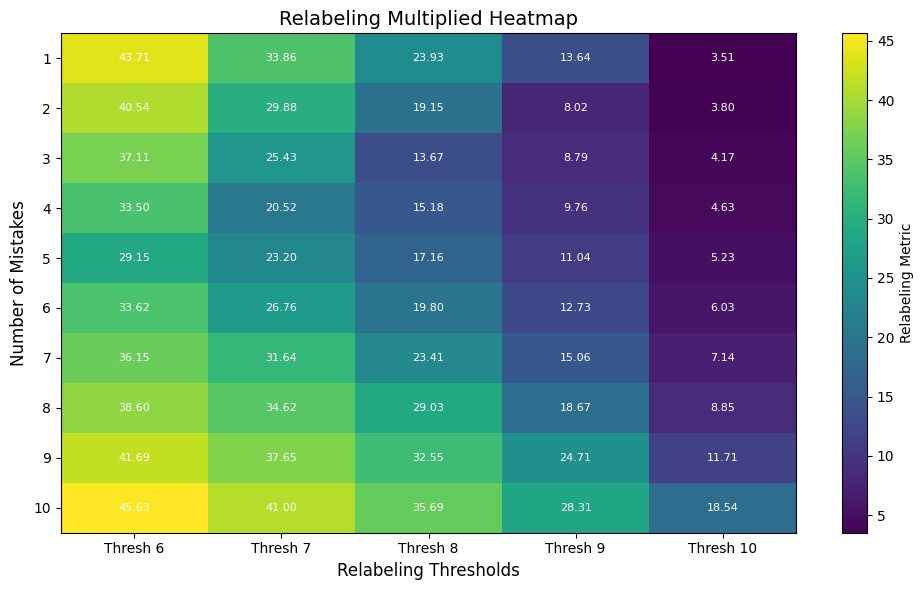

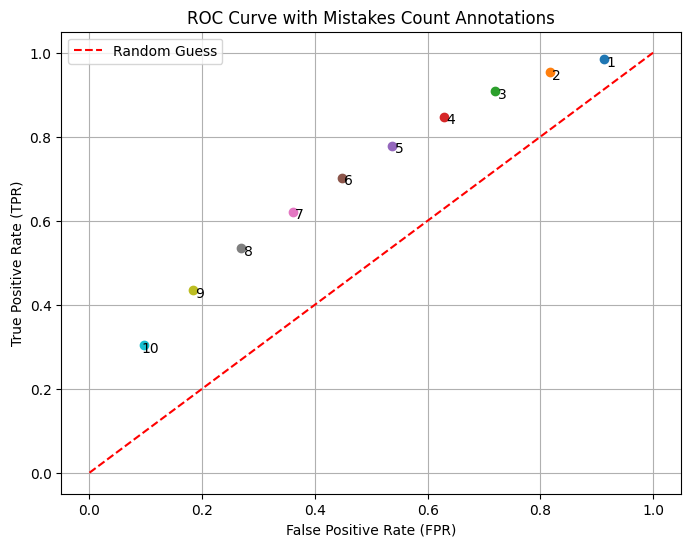

Area Under the Curve (AUC): 0.589056895488616


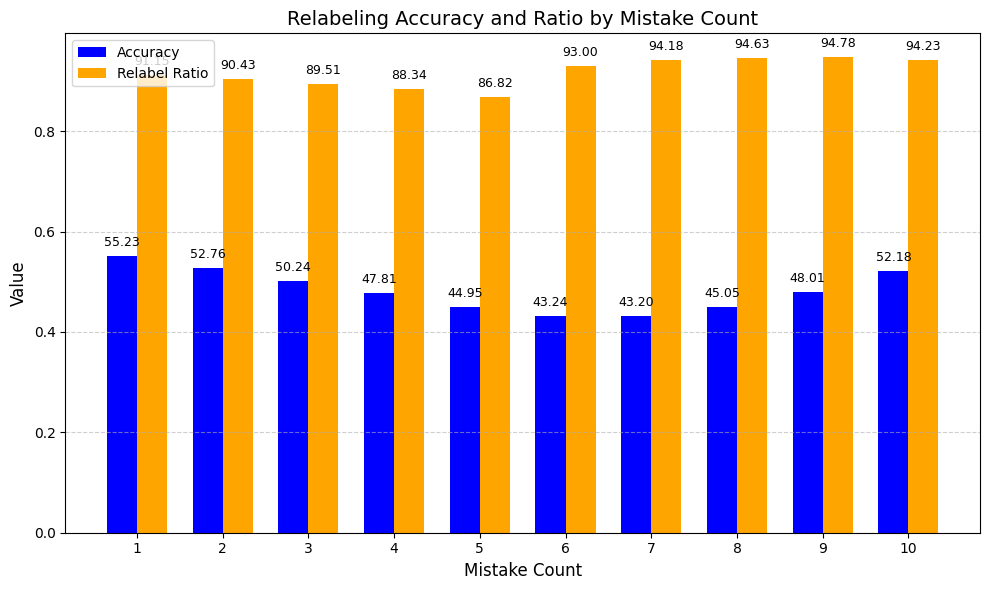

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7206    0.6397    0.6777     30197
       Noisy     0.5309    0.6217    0.5727     19803

    accuracy                         0.6326     50000
   macro avg     0.6257    0.6307    0.6252     50000
weighted avg     0.6454    0.6326    0.6361     50000



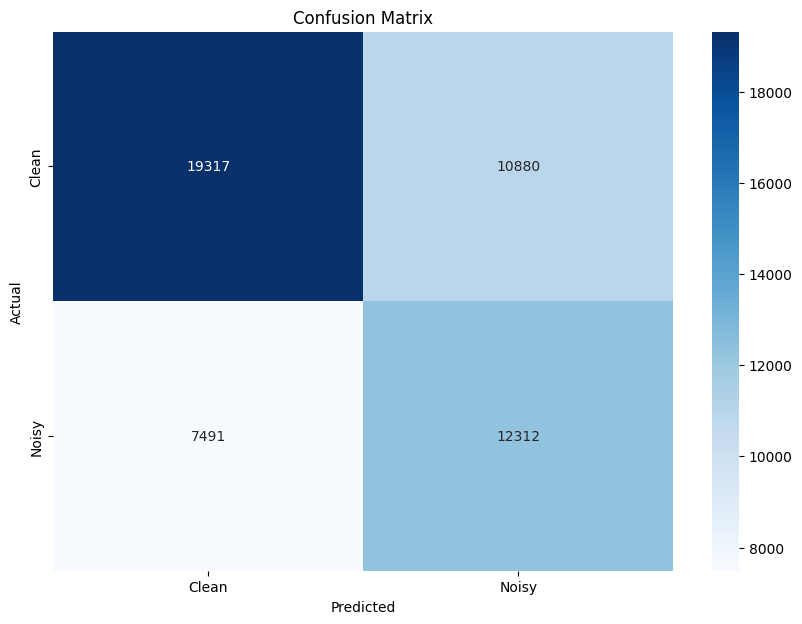

              precision    recall  f1-score   support

       Clean     0.6524    0.6929    0.6720     30197
       Noisy     0.4827    0.4371    0.4588     19803

    accuracy                         0.5916     50000
   macro avg     0.5676    0.5650    0.5654     50000
weighted avg     0.5852    0.5916    0.5876     50000



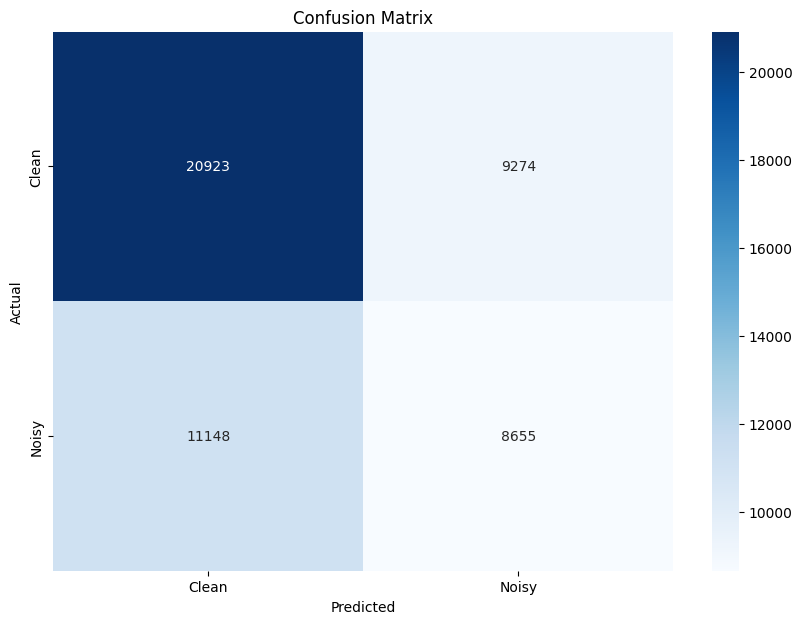

17929 removed from dataset and 5263 relabled
28.88% noise remained in 32071 data


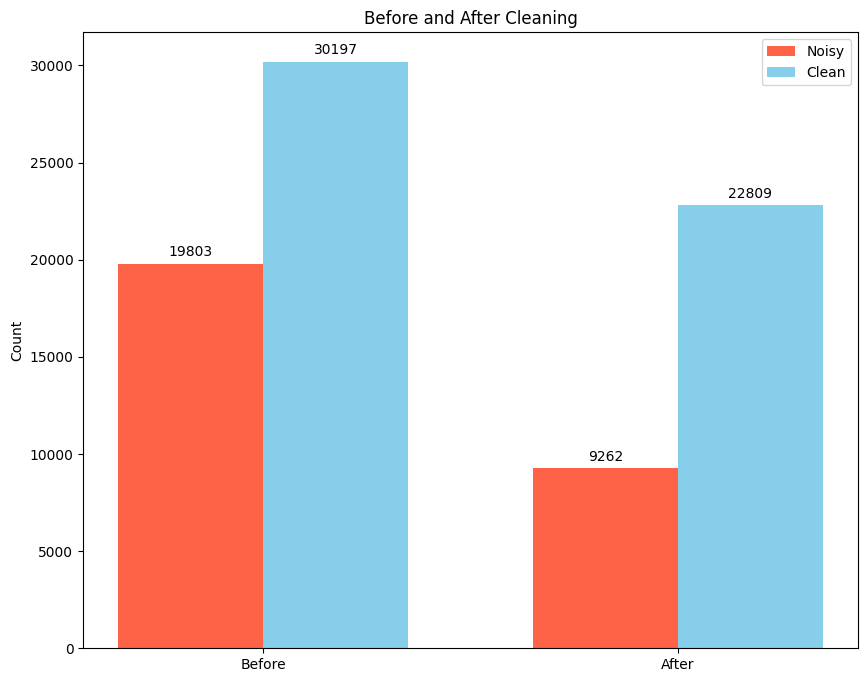

100%|██████████| 32071/32071 [00:01<00:00, 20518.49it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-40.pkl


In [9]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=9)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-40')

## CIFAR 100 - 20

In [3]:
train_dataset = CIFAR100(root='data', train=True, download=True)
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Optional
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=15, outer_folds_num=15, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=300000, 
                             val_pairs=30000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.4, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=4, freeze_epoch=None, noisy_indices_path='cifar100(128)(20)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar100(128)(20)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11),
                             num_class=100, siamese_middle_size=100)

Files already downloaded and verified
Seed: 51


/home/aref/projects/SiameseNoiseDetection/models/predefined.py:89: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /build/python-pytorch/src/pytorch-rocm/aten/src/ATen/Context.cpp:310.)
  A = x.contiguous().view(1, -1).mm(W[int(y)]).squeeze(0)


noise count: 10216 out of 50000 data


Skipping outer fold 1 with results:
43.688037012557835% accuracy in 1513 data
Loaded 1513 noisy indices from cifar100(128)(20)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
42.885245901639344% accuracy in 1525 data
Loaded 1525 noisy indices from cifar100(128)(20)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
45.39473684210527% accuracy in 1520 data
Loaded 1520 noisy indices from cifar100(128)(20)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
45.38866930171278% accuracy in 1518 data
Loaded 1518 noisy indices from cifar100(128)(20)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
44.45955132562883% accuracy in 1471 data
Loaded 1471 noisy indices from cifar100(128)(20)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
45.08361204013378% accuracy in 1495 data
Loaded 1495 noisy indices from cifar100(128)(20)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
44.06887

Epoch 40/1000:   4%|▍         | 41/1000 [1:43:46<40:27:27, 151.87s/it, val_loss=10.3, val_contrastive=4.52, val_accuracy=48.8, train_loss=7.95, train_contrastive=4.6, best_accuracy=50.1, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


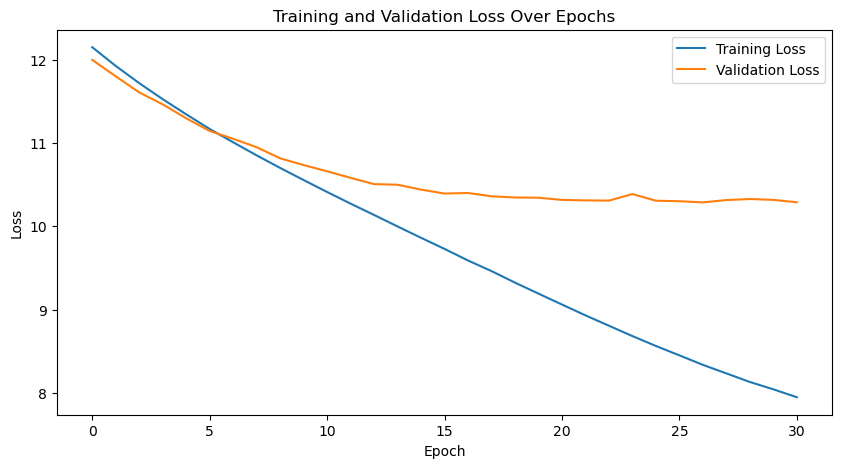

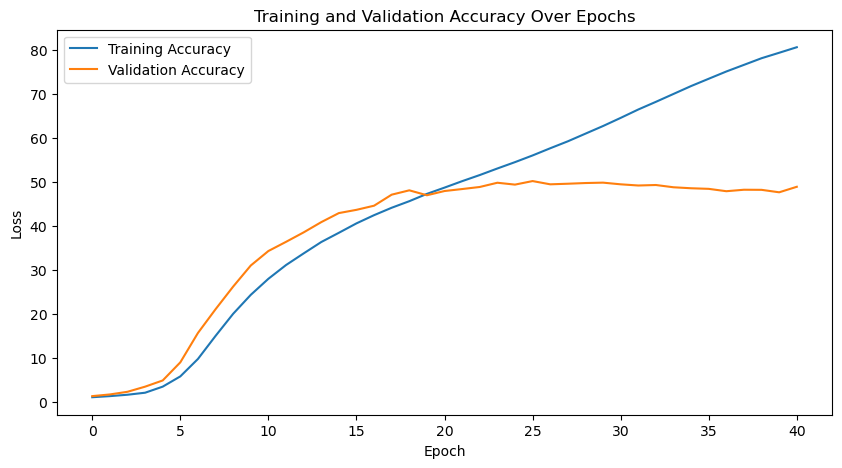

Extracting Embeddings: 100%|██████████| 35/35 [00:01<00:00, 20.00it/s]


Distance between embedding 135 and 823: 2.3041
Distance between embedding 135 and 665: 2.0587
Distance between embedding 135 and 589: 2.2471
Distance between embedding 135 and 2127: 2.2444
Distance between embedding 135 and 173: 2.2290
Distance between embedding 135 and 2646: 2.2433
Distance between embedding 135 and 2050: 2.0308
Distance between embedding 135 and 3772: 2.2472
Distance between embedding 135 and 357: 2.3631
Distance between embedding 135 and 457: 2.2633
Distance between embedding 135 and 703: 2.1847
Distance between embedding 135 and 3967: 1.8098
Distance between embedding 135 and 3386: 2.0973
Distance between embedding 135 and 4356: 2.3725
Distance between embedding 135 and 27: 1.9437
Distance between embedding 135 and 1722: 2.4380
Distance between embedding 135 and 578: 2.2198
Distance between embedding 135 and 4039: 2.4908
Distance between embedding 135 and 2204: 2.3725
Distance between embedding 823 and 665: 2.3045
Distance between embedding 823 and 589: 2.2459
Dist

Testing: 100%|██████████| 35/35 [00:01<00:00, 23.64it/s]


Test Accuracy: 50.13%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:49:17<40:32:17, 152.49s/it, val_loss=10.4, val_contrastive=4.56, val_accuracy=48.3, train_loss=7.93, train_contrastive=4.59, best_accuracy=49.9, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 15.42it/s]


Test Accuracy: 49.87%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:50:04<40:49:48, 153.59s/it, val_loss=10.2, val_contrastive=4.49, val_accuracy=48.2, train_loss=7.83, train_contrastive=4.56, best_accuracy=50.4, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.71it/s]


Test Accuracy: 50.45%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:50:15<40:53:43, 153.84s/it, val_loss=10.2, val_contrastive=4.49, val_accuracy=49.5, train_loss=7.73, train_contrastive=4.56, best_accuracy=51.9, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.27it/s]


Test Accuracy: 51.90%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:50:30<40:59:31, 154.20s/it, val_loss=10.5, val_contrastive=4.56, val_accuracy=47, train_loss=7.98, train_contrastive=4.59, best_accuracy=49.5, best_loss=10.4]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.05it/s]


Test Accuracy: 49.49%
Test Precision: 0.51
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:50:29<40:59:05, 154.17s/it, val_loss=10.4, val_contrastive=4.57, val_accuracy=48.6, train_loss=7.87, train_contrastive=4.56, best_accuracy=50.7, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 11.78it/s]


Test Accuracy: 50.67%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:52:54<40:53:12, 153.97s/it, val_loss=10.3, val_contrastive=4.57, val_accuracy=49, train_loss=7.78, train_contrastive=4.55, best_accuracy=51, best_loss=10.2]    


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 11.84it/s]


Test Accuracy: 50.96%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:42:56<41:10:39, 154.42s/it, val_loss=10.3, val_contrastive=4.57, val_accuracy=49.3, train_loss=7.93, train_contrastive=4.59, best_accuracy=52, best_loss=10.3]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 11.83it/s]


Test Accuracy: 52.01%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:55:45<40:56:28, 154.33s/it, val_loss=10.5, val_contrastive=4.44, val_accuracy=46, train_loss=7.65, train_contrastive=4.53, best_accuracy=50.2, best_loss=10.4]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.09it/s]


Test Accuracy: 50.16%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:45:51<41:15:52, 154.90s/it, val_loss=10.3, val_contrastive=4.57, val_accuracy=47.4, train_loss=7.79, train_contrastive=4.56, best_accuracy=51.3, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 10.94it/s]


Test Accuracy: 51.25%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10
Training fold 11/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:48:36<41:17:13, 155.15s/it, val_loss=10.6, val_contrastive=4.58, val_accuracy=44.9, train_loss=7.95, train_contrastive=4.59, best_accuracy=50, best_loss=10.5]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.28it/s]


Test Accuracy: 50.02%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_11.pth
Finished training fold 11
Training fold 12/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:45:39<41:11:23, 154.62s/it, val_loss=10.2, val_contrastive=4.54, val_accuracy=48.4, train_loss=7.93, train_contrastive=4.59, best_accuracy=51.3, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.37it/s]


Test Accuracy: 51.34%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_12.pth
Finished training fold 12
Training fold 13/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:53:32<41:07:05, 154.84s/it, val_loss=10.4, val_contrastive=4.52, val_accuracy=48.4, train_loss=7.7, train_contrastive=4.54, best_accuracy=50.4, best_loss=10.4] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 11.94it/s]


Test Accuracy: 50.38%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_13.pth
Finished training fold 13
Training fold 14/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:56:19<41:08:37, 155.10s/it, val_loss=10.4, val_contrastive=4.54, val_accuracy=47.7, train_loss=7.66, train_contrastive=4.53, best_accuracy=50.8, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.16it/s]


Test Accuracy: 50.83%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_14.pth
Finished training fold 14
Training fold 15/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:48:57<41:25:17, 155.65s/it, val_loss=10.5, val_contrastive=4.52, val_accuracy=46.7, train_loss=7.8, train_contrastive=4.57, best_accuracy=50.4, best_loss=10.4] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.03it/s]


Test Accuracy: 50.43%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_15.pth
Finished training fold 15


Evaluating Noisy Samples: 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]


33.42696629213483% relabeling accuracy


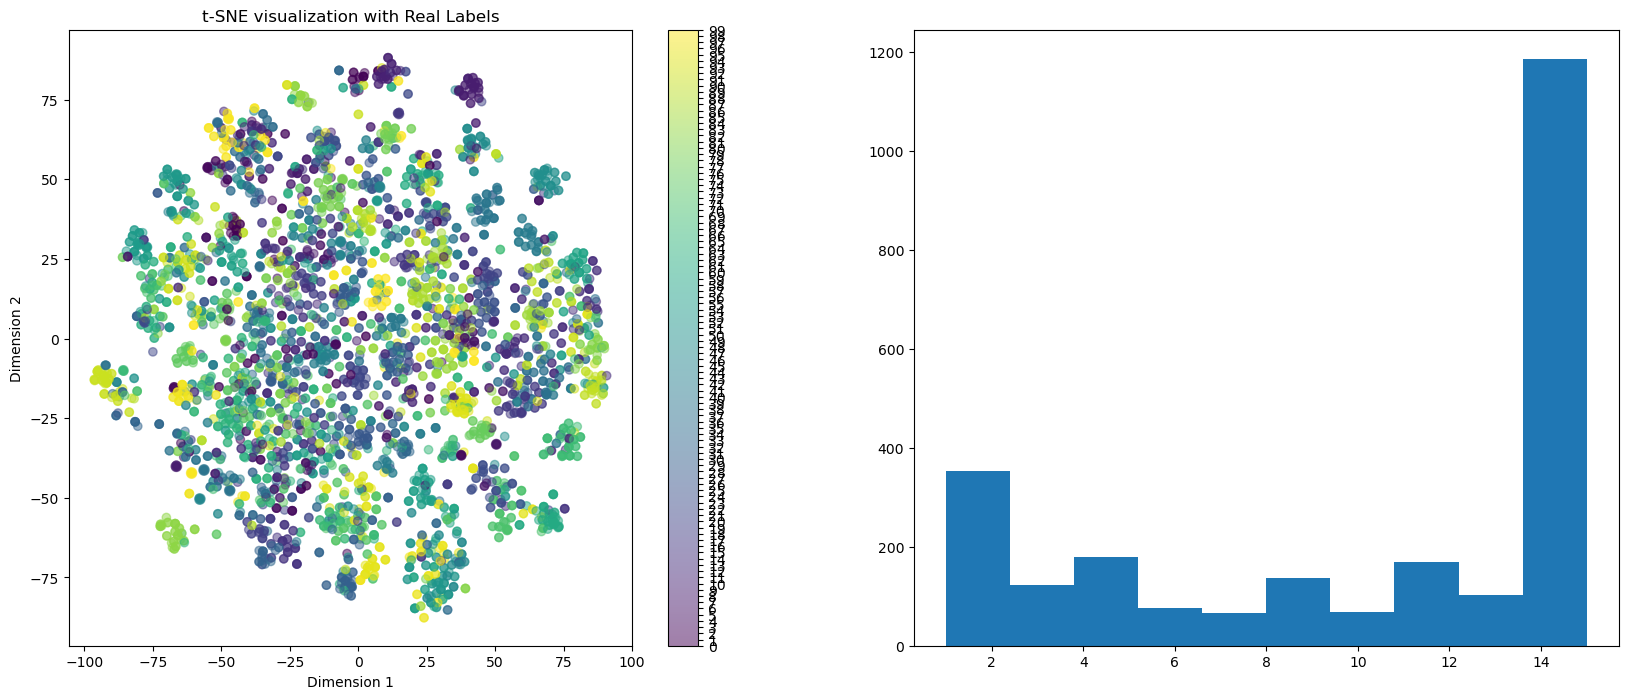

Predicted noise indices: [np.int64(63), np.int64(92), np.int64(126), np.int64(158), np.int64(187), np.int64(319), np.int64(339), np.int64(379), np.int64(433), np.int64(436), np.int64(450), np.int64(494), np.int64(529), np.int64(600), np.int64(605), np.int64(635), np.int64(695), np.int64(753), np.int64(755), np.int64(826), np.int64(865), np.int64(905), np.int64(951), np.int64(993), np.int64(1006), np.int64(1008), np.int64(1013), np.int64(1032), np.int64(1061), np.int64(1101), np.int64(1119), np.int64(1146), np.int64(1199), np.int64(1264), np.int64(1270), np.int64(1275), np.int64(1323), np.int64(1418), np.int64(1435), np.int64(1439), np.int64(1448), np.int64(1464), np.int64(1504), np.int64(1613), np.int64(1638), np.int64(1680), np.int64(1725), np.int64(1733), np.int64(1800), np.int64(1889), np.int64(1890), np.int64(1932), np.int64(1948), np.int64(1973), np.int64(1998), np.int64(2033), np.int64(2034), np.int64(2074), np.int64(2075), np.int64(2118), np.int64(2167), np.int64(2169), np.int64

Epoch 45/1000:   5%|▍         | 46/1000 [2:00:27<41:38:08, 157.12s/it, val_loss=10.3, val_contrastive=4.48, val_accuracy=47.8, train_loss=7.68, train_contrastive=4.55, best_accuracy=49.8, best_loss=10.3]

Early stopping triggered
Loading best model from checkpoint...


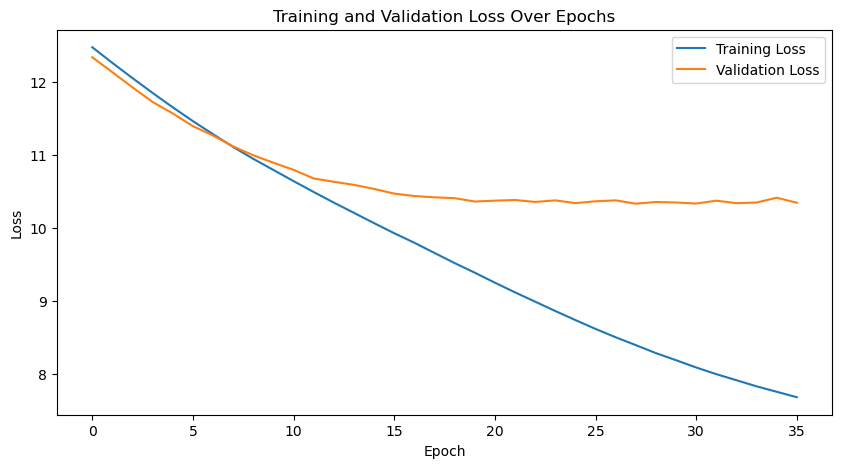

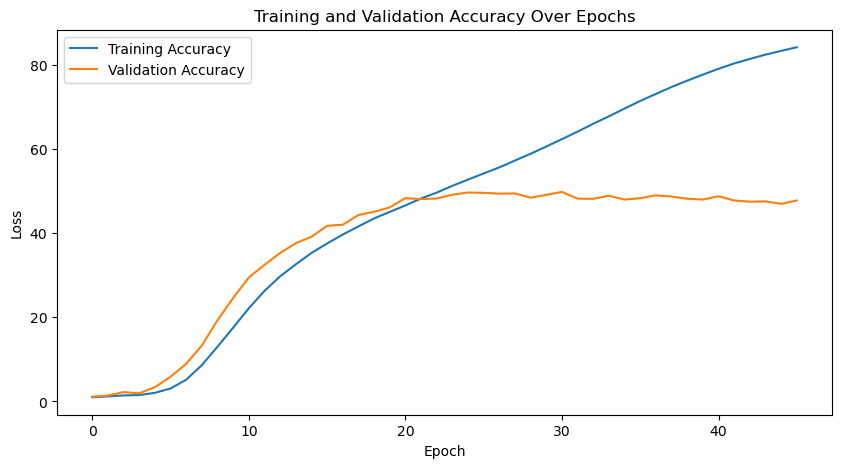

Extracting Embeddings: 100%|██████████| 35/35 [00:04<00:00,  8.53it/s]


Distance between embedding 2587 and 3218: 2.4500
Distance between embedding 2587 and 3987: 2.7046
Distance between embedding 2587 and 4025: 2.3800
Distance between embedding 2587 and 1857: 2.9677
Distance between embedding 2587 and 1502: 2.3158
Distance between embedding 2587 and 2144: 2.7187
Distance between embedding 2587 and 1969: 2.5226
Distance between embedding 2587 and 549: 2.7333
Distance between embedding 2587 and 1075: 2.2736
Distance between embedding 2587 and 3676: 2.3197
Distance between embedding 2587 and 3387: 2.6192
Distance between embedding 2587 and 4436: 2.3379
Distance between embedding 2587 and 3940: 2.7311
Distance between embedding 2587 and 1313: 2.6916
Distance between embedding 2587 and 81: 2.2326
Distance between embedding 2587 and 2072: 2.7590
Distance between embedding 2587 and 3694: 2.4422
Distance between embedding 2587 and 1318: 2.7498
Distance between embedding 2587 and 881: 2.6578
Distance between embedding 3218 and 3987: 2.4729
Distance between embeddi

Testing: 100%|██████████| 35/35 [00:03<00:00,  9.28it/s]


Test Accuracy: 49.80%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:45:00<42:00:22, 157.52s/it, val_loss=10.3, val_contrastive=4.53, val_accuracy=47.4, train_loss=7.82, train_contrastive=4.58, best_accuracy=51.8, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  8.35it/s]


Test Accuracy: 51.79%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/15...


Epoch 46/1000:   5%|▍         | 47/1000 [2:03:53<41:52:03, 158.16s/it, val_loss=10.3, val_contrastive=4.5, val_accuracy=49.4, train_loss=7.62, train_contrastive=4.52, best_accuracy=50.8, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.79it/s]


Test Accuracy: 50.81%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:51:09<42:15:36, 158.81s/it, val_loss=10.3, val_contrastive=4.56, val_accuracy=49.2, train_loss=7.95, train_contrastive=4.6, best_accuracy=52.7, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.98it/s]


Test Accuracy: 52.69%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:48:41<42:22:20, 159.06s/it, val_loss=10.4, val_contrastive=4.56, val_accuracy=47.2, train_loss=7.99, train_contrastive=4.61, best_accuracy=49.5, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.45it/s]


Test Accuracy: 49.53%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/15...


Epoch 46/1000:   5%|▍         | 47/1000 [2:04:03<41:55:20, 158.36s/it, val_loss=10.3, val_contrastive=4.47, val_accuracy=47.1, train_loss=7.52, train_contrastive=4.5, best_accuracy=51.1, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.24it/s]


Test Accuracy: 51.05%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:55:49<41:56:31, 157.94s/it, val_loss=10.4, val_contrastive=4.58, val_accuracy=47.4, train_loss=8.01, train_contrastive=4.6, best_accuracy=50.6, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.98it/s]


Test Accuracy: 50.60%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:58:24<41:52:45, 157.87s/it, val_loss=10.4, val_contrastive=4.49, val_accuracy=46.6, train_loss=7.54, train_contrastive=4.52, best_accuracy=49.7, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.17it/s]


Test Accuracy: 49.71%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:45:25<42:10:15, 158.14s/it, val_loss=10.3, val_contrastive=4.61, val_accuracy=49, train_loss=8.09, train_contrastive=4.62, best_accuracy=52, best_loss=10.3]    


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.22it/s]


Test Accuracy: 52.01%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/15...


Epoch 45/1000:   5%|▍         | 46/1000 [2:01:17<41:55:30, 158.21s/it, val_loss=10.3, val_contrastive=4.44, val_accuracy=47.8, train_loss=7.53, train_contrastive=4.5, best_accuracy=49.8, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.28it/s]


Test Accuracy: 49.84%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10
Training fold 11/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:59:30<42:16:04, 159.33s/it, val_loss=10.4, val_contrastive=4.48, val_accuracy=45.4, train_loss=7.73, train_contrastive=4.55, best_accuracy=49.7, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.50it/s]


Test Accuracy: 49.71%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_11.pth
Finished training fold 11
Training fold 12/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:52:02<42:35:41, 160.06s/it, val_loss=10.2, val_contrastive=4.49, val_accuracy=48.1, train_loss=7.76, train_contrastive=4.56, best_accuracy=51.5, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.47it/s]


Test Accuracy: 51.50%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_12.pth
Finished training fold 12
Training fold 13/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:57:48<42:39:44, 160.65s/it, val_loss=10.2, val_contrastive=4.46, val_accuracy=48.6, train_loss=7.62, train_contrastive=4.52, best_accuracy=50.4, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.12it/s]


Test Accuracy: 50.36%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_13.pth
Finished training fold 13
Training fold 14/15...


Epoch 45/1000:   5%|▍         | 46/1000 [2:02:31<42:21:05, 159.82s/it, val_loss=10.5, val_contrastive=4.5, val_accuracy=44.8, train_loss=7.7, train_contrastive=4.55, best_accuracy=47.9, best_loss=10.5]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.76it/s]


Test Accuracy: 47.85%
Test Precision: 0.49
Test Recall: 0.48
Test F1 Score: 0.47
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_14.pth
Finished training fold 14
Training fold 15/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:46:46<42:42:36, 160.16s/it, val_loss=10.3, val_contrastive=4.58, val_accuracy=49.1, train_loss=8.03, train_contrastive=4.61, best_accuracy=52.4, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.96it/s]


Test Accuracy: 52.35%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_15.pth
Finished training fold 15


Evaluating Noisy Samples: 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]


34.2937456078707% relabeling accuracy


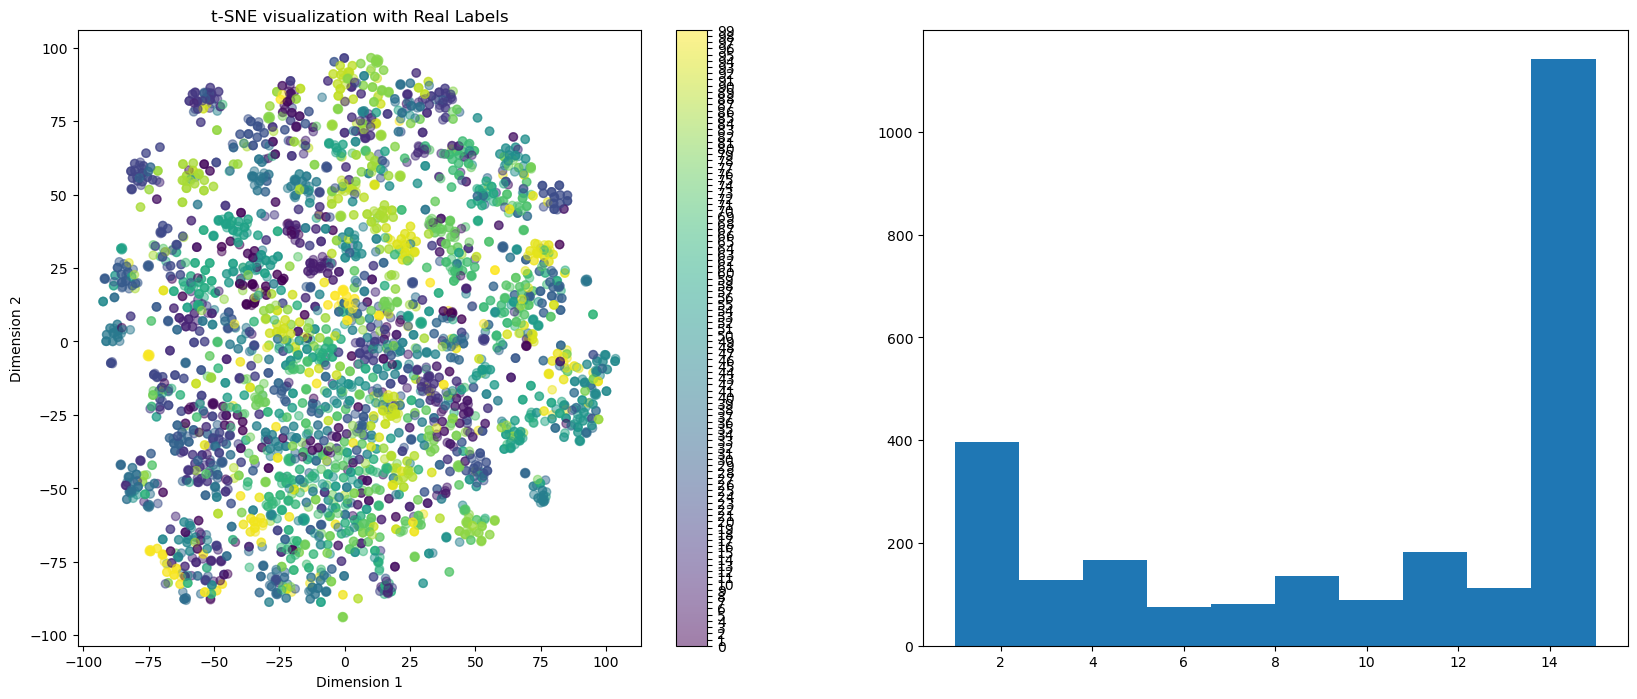

Predicted noise indices: [np.int64(3), np.int64(42), np.int64(44), np.int64(62), np.int64(83), np.int64(117), np.int64(130), np.int64(192), np.int64(217), np.int64(242), np.int64(250), np.int64(279), np.int64(286), np.int64(287), np.int64(341), np.int64(370), np.int64(438), np.int64(455), np.int64(610), np.int64(624), np.int64(674), np.int64(684), np.int64(724), np.int64(761), np.int64(794), np.int64(856), np.int64(890), np.int64(907), np.int64(937), np.int64(955), np.int64(1014), np.int64(1049), np.int64(1050), np.int64(1125), np.int64(1165), np.int64(1187), np.int64(1277), np.int64(1279), np.int64(1324), np.int64(1346), np.int64(1381), np.int64(1390), np.int64(1417), np.int64(1437), np.int64(1469), np.int64(1482), np.int64(1537), np.int64(1589), np.int64(1597), np.int64(1758), np.int64(1786), np.int64(1798), np.int64(1814), np.int64(1817), np.int64(1834), np.int64(1905), np.int64(1927), np.int64(1955), np.int64(1991), np.int64(2102), np.int64(2126), np.int64(2134), np.int64(2164), np

In [4]:
noise_cleaner.clean()